<a href="https://colab.research.google.com/github/shaks2510/SProject/blob/main/DeepLearningMNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization




In [5]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
xtrain.shape

(60000, 28, 28)

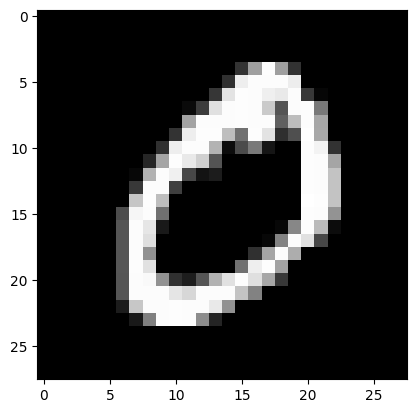

In [7]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [8]:
ytrain[1]

0

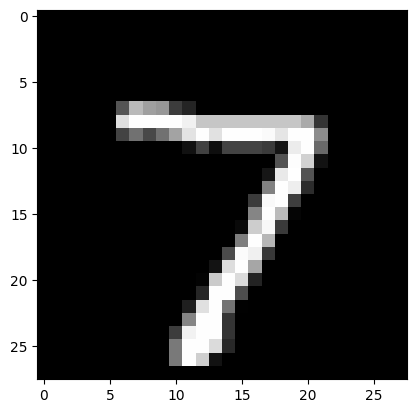

In [9]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [10]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [11]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [12]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [13]:
x_test.shape

(10000, 784)

In [35]:
x_train/=255
x_test/=255

In [36]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [37]:
# Initialize the constructor

model = Sequential()

In [38]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
epochs = 10
batch_size = 20000


history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = .1, verbose=True)
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)

Epoch 1/10
3/3 [==============================] - 5s 1s/step - loss: 2.3010 - accuracy: 0.0998 - val_loss: 2.2972 - val_accuracy: 0.1670
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 2.2957 - accuracy: 0.2041 - val_loss: 2.2909 - val_accuracy: 0.3293
Epoch 3/10
3/3 [==============================] - 3s 1s/step - loss: 2.2892 - accuracy: 0.3561 - val_loss: 2.2831 - val_accuracy: 0.4055
Epoch 4/10
3/3 [==============================] - 3s 1s/step - loss: 2.2810 - accuracy: 0.4075 - val_loss: 2.2731 - val_accuracy: 0.4368
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 2.2705 - accuracy: 0.4291 - val_loss: 2.2603 - val_accuracy: 0.4558
Epoch 6/10
3/3 [==============================] - 3s 1s/step - loss: 2.2573 - accuracy: 0.4504 - val_loss: 2.2444 - val_accuracy: 0.4887
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 2.2409 - accuracy: 0.4812 - val_loss: 2.2248 - val_accuracy: 0.5065
Epoch 8/10
3/3 [=========================

In [41]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.517
Loss: 2.138


In [44]:
y_predict = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [45]:
y_predict[0]

array([0.08717367, 0.09933693, 0.08827816, 0.09495255, 0.10254391,
       0.07977089, 0.08470328, 0.1380719 , 0.0912276 , 0.13394125],
      dtype=float32)

In [46]:
np.argmax(y_predict[0])

7

In [47]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 898    4    1    0    0    0   18    0    0   59]
 [   0 1118    4    0    0    0    2    0    0   11]
 [  58  142  713    0    0    0   15   13    7   84]
 [ 123  271  145  217    0    0    6    5   21  222]
 [   9   20    1    0    0    0    9    1    0  942]
 [ 202  176    6   43    0    0   24    0    3  438]
 [  38   66   16    0    0    0  748    0    0   90]
 [   1   68    7    0    0    0    0  411    0  541]
 [  80  234   68    8    0    0    6    0   99  479]
 [  13   25    1    0    0    0    2    5    0  963]]


In [48]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.92      0.75       980
           1       0.53      0.99      0.69      1135
           2       0.74      0.69      0.72      1032
           3       0.81      0.21      0.34      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.90      0.78      0.84       958
           7       0.94      0.40      0.56      1028
           8       0.76      0.10      0.18       974
           9       0.25      0.95      0.40      1009

    accuracy                           0.52     10000
   macro avg       0.56      0.50      0.45     10000
weighted avg       0.56      0.52      0.45     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.16699999570846558, 0.3293333351612091, 0.40549999475479126, 0.43683332204818726, 0.4558333456516266, 0.4886666536331177, 0.5065000057220459, 0.5059999823570251, 0.5141666531562805, 0.515333354473114]
[0.09975925832986832, 0.20407406985759735, 0.3560926020145416, 0.40748149156570435, 0.4291481375694275, 0.45044443011283875, 0.48124074935913086, 0.49799999594688416, 0.505481481552124, 0.5096111297607422]


<Axes: >

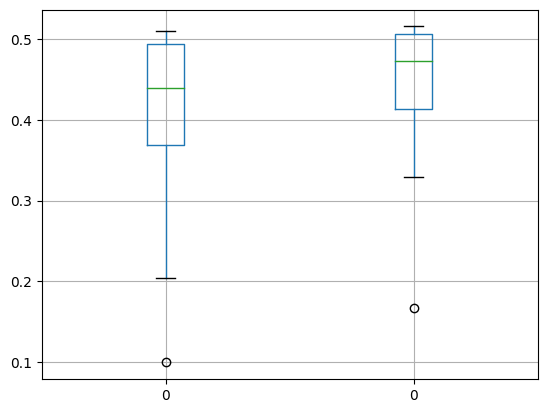

In [49]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta, va], axis= 1)

tva.boxplot()